In [104]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [105]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import util

% matplotlib inline
plt.style.use("ggplot")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Exploratory Data Analysis

In [106]:
#Loading data 
df = pd.read_csv("data/exercise_01_train.csv")

In [107]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,1.916575,5.240820,euorpe,2.431170,0.454074,-18.572032,-14.291524,0.178579,18.110170,0
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,0.370941,-3.794542,asia,2.592326,31.921833,3.317139,10.037003,-1.930870,-3.486898,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1.449817,12.470532,asia,7.143821,9.401490,-10.604968,7.643215,-0.842198,-79.358236,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,-3.274733,3.484450,asia,-4.998195,-20.312810,14.818524,-9.180674,1.356972,14.475681,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,-0.644261,4.082783,asia,-0.012556,-29.334324,1.734433,-12.262072,-0.043228,-19.003881,0


In [108]:
df.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
39995,20.844737,-33.785846,-0.346804,-3.406866,34.771517,-57.951056,-0.288205,1.371940,3.335447,1.765670,...,-2.985304,7.312132,asia,5.964857,-13.061671,-8.062604,16.618593,-3.609543,0.631066,0
39996,1.666154,16.241028,12.623090,-6.168540,-10.650748,69.840299,-0.965011,-4.321631,3.071324,-0.209940,...,-5.842786,3.563600,asia,4.895863,-1.342384,-10.275539,14.046990,-0.320440,46.051387,0
39997,1.795836,-15.706685,1.009672,-0.887671,-11.580529,3.237055,0.541397,2.562310,-0.623586,3.300388,...,7.503255,-11.064043,america,6.783607,15.293008,-6.194035,-4.725605,-1.321478,27.836630,0
39998,50.168318,-4.272643,2.409248,-11.697615,39.234827,31.353302,1.416008,1.825775,2.027886,-3.753114,...,-1.411384,-17.587621,america,6.278226,-18.743967,-8.067506,5.258203,-2.623772,-15.550075,0
39999,-8.653274,10.572796,1.377445,-21.472814,-42.686853,28.893360,3.379456,-1.241659,-0.040278,0.612898,...,7.622624,-6.473851,asia,0.055730,-6.506186,12.434701,-6.001283,-5.340633,18.276723,1


In [109]:
print("Number of columns: {} \nNumber of rows: {}".format(df.shape[1], df.shape[0]))

Number of columns: 101 
Number of rows: 40000


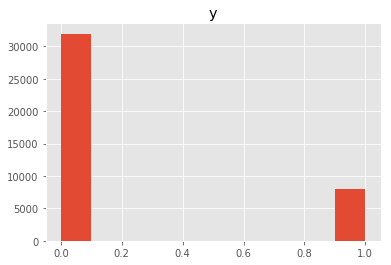

In [110]:
# Lets see the distribution of the label
df.hist(column="y")
plt.show()

In [111]:
y_dict = Counter(df["y"])
print("The minority class make up {}% of the data"
      .format(round(y_dict[1]/df.shape[0] *100)))

print("The majority class make up {}% of the data"
      .format(round(y_dict[0]/df.shape[0] *100)))

The minority class make up 20% of the data
The majority class make up 80% of the data


In [112]:
# This show the class label is imbalanced and skewed towards the negative class ("0" class)

In [113]:
categorical_cols = util.non_numerical_col(df)

In [114]:
# Taking a look at the contents of categorical features
for col in categorical_cols:
    print(pd.unique(df[col]), "\n")

['bmw' 'nissan' 'Honda' 'Toyota' 'volkswagon' 'tesla' 'chrystler' 'ford'
 'mercades' nan 'chevrolet'] 

['wed' 'thur' 'thurday' 'wednesday' 'friday' 'tuesday' 'monday' 'fri' nan] 

['$-54.1' '$-229.32' '$243.68' ... '$1215.91' '$-723.78' '$-426.49'] 

['0.0%' '0.01%' '-0.01%' '0.02%' '-0.02%' '-0.0%' '-0.03%' '0.03%' '0.04%'
 '-0.04%' nan] 

['Jun' 'July' 'May' 'Aug' 'Apr' 'Mar' 'Oct' 'sept.' 'Nov' 'Feb' 'Dev' nan
 'January'] 

['euorpe' 'asia' 'america' nan] 



In [115]:
# Looking into the features, these contain car manufacturer, days of the week, 
# dollar amount, percentage, month of the year, continent. Lets change the the dollar amount 
# and the percentage attributes to numerical values

In [116]:
util.regex(df, ["x41","x45"])

In [117]:
type(df["x45"][0])

numpy.float64

In [118]:
# Since there are few unique values in "x34", "x35", "x68" and "x93" it is a good idea to turn 
# them into dummy variables. But before doing that, observe that there are nan values. 
# Lets also see how much of the data is nan 

In [119]:
region = Counter(df["x93"])
cars = Counter(df["x34"])
days = Counter(df["x35"])
month = Counter(df["x68"])

In [120]:
print(region,"\n\n", cars,"\n\n", days,"\n\n", month)

Counter({'asia': 35409, 'america': 3136, 'euorpe': 1448, nan: 7}) 

 Counter({'volkswagon': 12572, 'Toyota': 10946, 'bmw': 7304, 'Honda': 5129, 'tesla': 2275, 'chrystler': 1223, 'nissan': 336, 'ford': 165, 'mercades': 32, 'chevrolet': 11, nan: 7}) 

 Counter({'wed': 14834, 'thurday': 13359, 'wednesday': 5891, 'thur': 4374, 'tuesday': 929, 'friday': 526, 'monday': 56, 'fri': 21, nan: 10}) 

 Counter({'July': 11088, 'Jun': 9279, 'Aug': 8155, 'May': 4788, 'sept.': 3466, 'Apr': 1641, 'Oct': 926, 'Mar': 409, 'Nov': 156, 'Feb': 54, 'Dev': 18, 'January': 11, nan: 9})


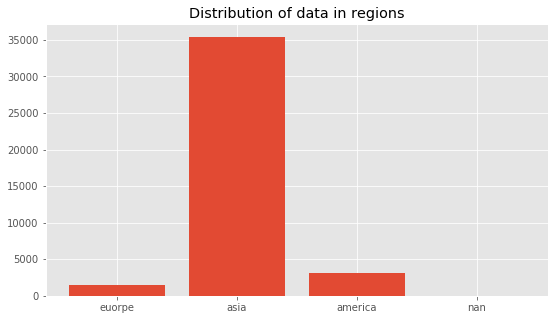

In [121]:
util.plot_cols(region, "regions")

In [122]:
print(region, "\n")
print("{}% of the data belong to asia category \n"
      .format(round(region["asia"]/sum(region.values())*100, 2)))
print("{}% of the data belong to asia category"
      .format(round(region["nan"]/sum(region.values())*100, 9)))

Counter({'asia': 35409, 'america': 3136, 'euorpe': 1448, nan: 7}) 

88.52% of the data belong to asia category 

0.0% of the data belong to asia category


In [123]:
# Doing the same for the other features

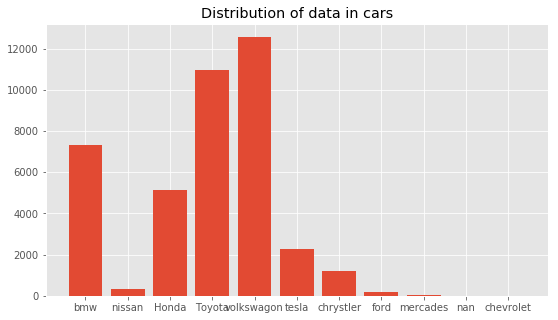

In [124]:
util.plot_cols(cars, "cars")

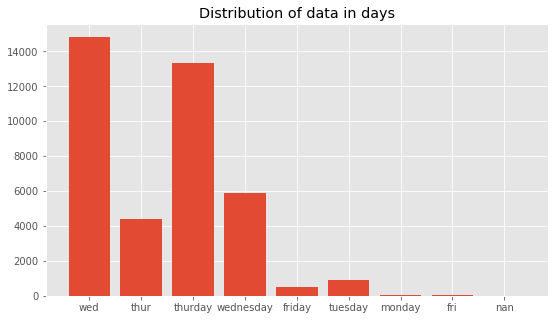

In [125]:
util.plot_cols(days, "days")

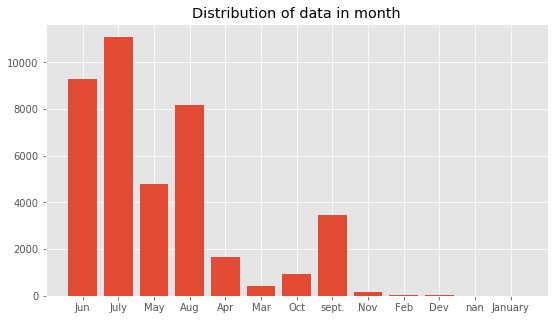

In [126]:
util.plot_cols(month, "month")

In [127]:
# Notice that in two of the plots, month and days there are duplicates in categories, 
# there are double entries of the month of january (as jun and January) and double entries 
# for wednesday/fiday as (wed and wednesday also fri and friday) as well as misspelling in thursday. 
# These categories will be merged as a single unique category. There are also mixed naming formats 
# used in days attribute (ie short and full) these will be changed for uniformity 

In [128]:
util.restructure_cols(df)

In [129]:
pd.unique(df["x35"])

array(['wed', 'thur', 'fri', 'tue', 'mon', nan], dtype=object)

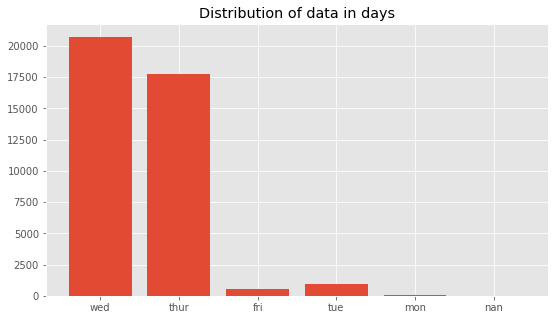

In [130]:
# After merging duplicates
util.plot_cols(Counter(df["x35"]), "days")

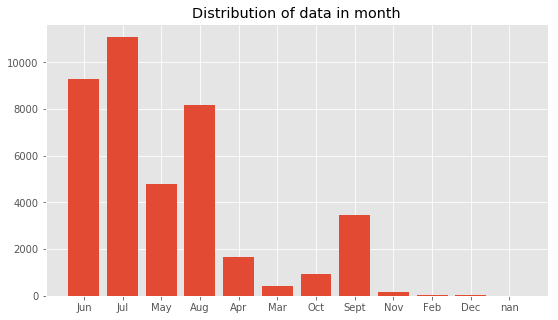

In [131]:
util.plot_cols(Counter(df["x68"]), "month")

In [132]:
# Now we can make these categorical attributs into one-hot-encoding

In [163]:
df_dummy = pd.get_dummies(df, prefix=["x34","x35","x68","x93"])

In [134]:
df_dummy.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jul,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_Sept,x93_america,x93_asia,x93_euorpe
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,0,1,0,0,0,0,0,0,0,1
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,1,0,0,0,0,0,0,0,1,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1,0,0,0,0,0,0,0,1,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,0,0,0,1,0,0,0,0,1,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,1,0,0,0,0,0,0,0,1,0


In [135]:
df_dummy.shape

(40000, 126)

In [136]:
# Creating one-hot-encoding have added 25 more features to the data
# Now the entire data is numerical, we can determine what subset from the feature will be relevant to a good model
# We can start by checking how much each feature correlates with the the label

In [137]:
df_corr = df_dummy.copy().corr()
df_na = df_dummy.copy()

In [138]:
df_corr.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x68_Jul,x68_Jun,x68_Mar,x68_May,x68_Nov,x68_Oct,x68_Sept,x93_america,x93_asia,x93_euorpe
x68_Oct,0.112879,-0.025157,-0.068854,-0.073669,-0.000956,0.014476,-0.004334,-0.000688,0.067641,0.001672,...,-0.095334,-0.084670,-0.015647,-0.056767,-0.009633,1.000000,-0.047416,0.008289,-0.001939,-0.008474
x68_Sept,0.150365,-0.036598,-0.094202,-0.098149,-0.007896,0.006901,0.000032,0.002633,0.089547,-0.001965,...,-0.190745,-0.169408,-0.031306,-0.113579,-0.019273,-0.047416,1.000000,0.005047,-0.002005,-0.003554
x93_america,-0.002837,0.004870,-0.005386,-0.000074,-0.008254,0.002762,0.006983,0.005911,-0.006394,0.008608,...,-0.009620,-0.001175,-0.000985,0.000178,-0.000344,0.008289,0.005047,1.000000,-0.810009,-0.056526
x93_asia,0.002733,-0.005581,0.003540,-0.001718,0.006708,-0.000033,-0.001783,-0.005009,0.005605,-0.008206,...,0.011324,-0.001809,0.002294,-0.000594,0.001139,-0.001939,-0.002005,-0.810009,1.000000,-0.538225
x93_euorpe,0.000018,0.002518,0.001768,0.003200,0.000079,-0.003590,-0.007008,0.000188,-0.000856,0.001120,...,-0.005497,0.004977,-0.002402,0.000690,-0.001390,-0.008474,-0.003554,-0.056526,-0.538225,1.000000


In [139]:
# There are multiple features in the data and we will not create 
# individual vizualization to see the correlation. To understand the 
# correlation, we will select correlation value of each feature with the label 

In [140]:
df_y = df_corr.loc[["y"],:]

In [141]:
# Sorting by positive correlation
df_y[df_y.iloc[-1,:].sort_values(ascending=False).index]

,y,x58,x97,x1,x99,x79,x63,x72,x69,x78,...,x96,x21,x50,x66,x3,x22,x70,x41,x37,x75
y,1.0,0.18666,0.184344,0.101217,0.098397,0.09582,0.095792,0.095313,0.095173,0.094825,...,-0.091515,-0.092892,-0.093171,-0.096199,-0.096704,-0.097655,-0.104042,-0.181519,-0.195297,-0.2105


In [142]:
# Sorting by negative correlation
df_y[df_y.iloc[-1,:].sort_values(ascending=True).index]

,x75,x37,x41,x70,x22,x3,x66,x50,x21,x96,...,x78,x69,x72,x63,x79,x99,x1,x97,x58,y
y,-0.2105,-0.195297,-0.181519,-0.104042,-0.097655,-0.096704,-0.096199,-0.093171,-0.092892,-0.091515,...,0.094825,0.095173,0.095313,0.095792,0.09582,0.098397,0.101217,0.184344,0.18666,1.0


In [143]:
# Generally there is a week correlation both positively and negatively. 
# The feature with the most correction correlation x75 has a correlation value 
# of -0.2105 which is a weak correlation value.  

In [164]:
# Now lets see how much null values are in the data
df_copy = df_dummy.copy()
df_dummy.dropna(inplace=True)
diff = df_copy.shape[0]-df_dummy.shape[0]
print("Data having null values: {} rows".format(diff))
print("Data lost by dropping null data {}%".format(round((diff/df_copy.shape[0])*100, 2)))

Data having null values: 768 rows
Data lost by dropping null data 1.92%


#### Lets try resampling the data to balance the dataset

The data is not a large dataset, undersampling the data will lead to loss of information. The better approach will be oversampling the minority class to the same amount of the majority class. A good technique for this is using SMOTE algorithm to generate synthetic data.

Since we do not know much about the features in the data besides the categorical features there is no clear cut way of making any assumptions about the NaN. Dropping NaN in the data should not have much impact on the model since observations with NaN only make up 2% of the data.

In [169]:
data = df_dummy.copy()
y = data.pop("y")
X = data.values

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=1)

In [171]:
print("Original dataset shape {}".format(dict(Counter(y_train))))

Original dataset shape {1: 5915, 0: 23509}


In [172]:
sm = SMOTE(random_state=1)

In [173]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [174]:
print("Resampled dataset shape {}".format(dict(Counter(y_train_res))))

Resampled dataset shape {1: 23509, 0: 23509}


In [176]:
# Now that we have prepared the data we can now start building a model

#### GradientBoosting Classifier

In [177]:
gb = GradientBoostingClassifier()
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [178]:
y_pred_gb = gb.predict(X_test)

In [179]:
precision_gb, recall_gb, accuracy_gb, matrix_gb = util.metric(y_test, y_pred_gb)

In [180]:
# Confusion matrix
matrix_gb

array([[1310,  277],
       [ 660, 7561]])

In [181]:
print("Recall: {}".format(round(recall_gb,2)))
print("Precision: {}".format(round(precision_gb,2)))

Recall: 0.66
Precision: 0.83


In [183]:
# See that the model still favours the negative class. This is probably as a result of the model 
# latching on some features due to their magnitude as the data is unscaled. Lets scale the data and perform a grid search

In [184]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_res)

In [185]:
gb3 = GradientBoostingClassifier()
gb3.fit(X_scaled, y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [191]:
X_test_scaled = scaler.transform(X_test)
y_pred_gb3 = gb3.predict(X_test_scaled)

In [192]:
precision_gb3, recall_gb3, accuracy_gb3, matrix_gb3 = util.metric(y_test, y_pred_gb3)

In [193]:
# Confusion matrix
matrix_gb3

array([[1310,  277],
       [ 660, 7561]])

In [194]:
print("Recall: {}".format(round(recall_gb3,2)))
print("Precision: {}".format(round(precision_gb3,2)))

Recall: 0.66
Precision: 0.83


In [203]:
#predicted probabilities
scores = gb3.predict_proba(X_test_scaled)

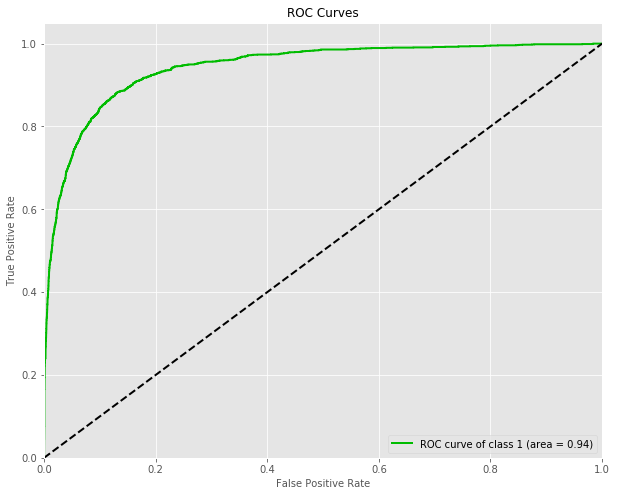

In [204]:
_=skplt.metrics.plot_roc(y_test, scores, 
                         classes_to_plot=[1], plot_micro=False, 
                         plot_macro=False, figsize=(10,8))

### GridSearch for Gradient Boosting

In [197]:
gb4 = GradientBoostingClassifier()

param_grid4 = {"learning_rate": [0.6,0.8],
               "n_estimators":[200, 300, 400, 500, 600],
                "max_depth":[2,3,5],
                "max_features":["log2", "sqrt",],
                "criterion": ["friedman_mse"]}

# run grid search
grid_search4 = GridSearchCV(gb4, param_grid=param_grid4, n_jobs=-1)

grid_search4.fit(X_scaled, y_train_res)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.6, 0.8], 'n_estimators': [200, 300, 400, 500, 600], 'max_depth': [2, 3, 5], 'max_features': ['log2', 'sqrt'], 'criterion': ['friedman_mse']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [198]:
gb_best = grid_search4.best_estimator_
gb_best

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.6, loss='deviance', max_depth=5,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [199]:
y_pred_gb4 = gb_best.predict(X_test_scaled)

In [200]:
precision_gb4, recall_gb4, accuracy_gb4, matrix_gb4 = util.metric(y_test, y_pred_gb4)

In [201]:
print("Recall: {}".format(round(recall_gb4,2)))
print("Precision: {}".format(round(precision_gb4,2)))

Recall: 0.86
Precision: 0.94


In [205]:
#predicted probabilities
scores4 = gb_best.predict_proba(X_test_scaled)

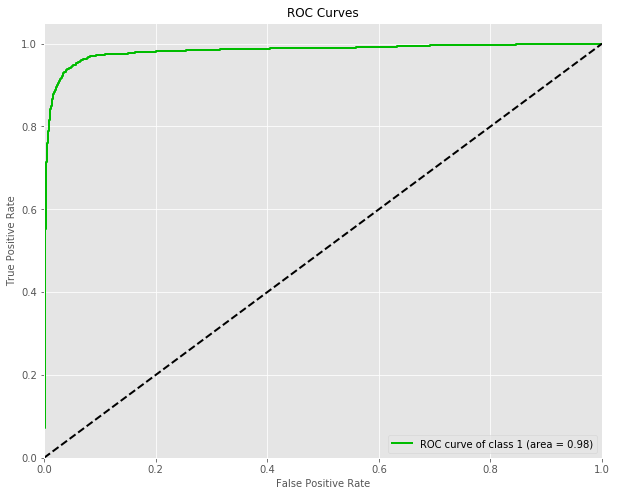

In [206]:
_=skplt.metrics.plot_roc(y_test, scores4, 
                         classes_to_plot=[1], plot_micro=False, 
                         plot_macro=False, figsize=(10,8))

In [207]:
# Another candidate that has potential of a good classification for this problem is 
# the Support Vector Classifier

### Support Vector Classifier

In [208]:
pipeline = Pipeline([('scaler', StandardScaler()),
                        ('svc', SVC(kernel='rbf'))])


In [209]:
pipeline.fit(X_train_res, y_train_res)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [210]:
y_pred_svc = pipeline.predict(X_test)

In [211]:
precision_svc, recall_svc, accuracy_svc, matrix_svc = util.metric(y_test, y_pred_svc)

In [53]:
# Confusion matrix
matrix_svc

array([[1865,   34],
       [ 105, 7804]])

In [54]:
print("Recall: {}".format(round(recall_svc,2)))
print("Precision: {}".format(round(precision_svc,2)))

Recall: 0.95
Precision: 0.98
